## Plane Price Prediction Project


The objective of this project is to develop a robust machine learning model that accurately predicts plane prices based on various features. The project will involve data collection, preprocessing, exploratory data analysis, feature engineering, model building, evaluation, and optimization.

## Initial Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('Plane Price.csv')

In [3]:
backup = dataset.copy

## DATA CLEANING


In [4]:
dataset.isnull().sum()/dataset.shape[0]*100

Model Name                 0.000000
Engine Type                0.000000
HP or lbs thr ea engine    0.000000
Max speed Knots            3.868472
Rcmnd cruise Knots         1.934236
Stall Knots dirty          2.901354
Fuel gal/lbs               0.000000
All eng rate of climb      0.773694
Eng out rate of climb      5.029014
Takeoff over 50ft          4.835590
Landing over 50ft          0.000000
Empty weight lbs           0.193424
Length ft/in               0.000000
Wing span ft/in            0.000000
Range N.M.                 3.481625
Price                      1.934236
dtype: float64

In [5]:
dataset.shape

(517, 16)

In [6]:
dataset.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [7]:
dataset=dataset.dropna()

In [8]:
dataset.shape

(421, 16)

In [9]:
dataset['HP or lbs thr ea engine'].unique()

array(['145', '85', '90', '65', '350', '290', '600', '450', '300', '275',
       '245', '220', '150', '115', '160', '180', '108', '850', '715',
       '680', '750', '550', '500', '380', '340', '295', '260', '325',
       '310', '285', '250', '240', '225', '205', '196', '185', '200',
       '165', '230', '190', '3,500', '2,950', '2,850', '4,000', '3,650',
       '1,900', '625', '375', '210', '675', '235', '175', '195', '110',
       '100', '270', '265', '4,750', '4,500', '3,700', '5,200', '4,125',
       '4,250', '4,315', '3,230', '620', '135', '700', '900', '1,000',
       '1000', '13,850', '11,400', '3,100', '2,500', '778', '727', '724',
       '776', '705', '280', '1200', '720'], dtype=object)

In [10]:
dataset['HP or lbs thr ea engine']=dataset['HP or lbs thr ea engine'].str.replace(',','').astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_13620\860179927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['HP or lbs thr ea engine']=dataset['HP or lbs thr ea engine'].str.replace(',','').astype(int)


In [11]:
dataset['HP or lbs thr ea engine'].unique()

array([  145,    85,    90,    65,   350,   290,   600,   450,   300,
         275,   245,   220,   150,   115,   160,   180,   108,   850,
         715,   680,   750,   550,   500,   380,   340,   295,   260,
         325,   310,   285,   250,   240,   225,   205,   196,   185,
         200,   165,   230,   190,  3500,  2950,  2850,  4000,  3650,
        1900,   625,   375,   210,   675,   235,   175,   195,   110,
         100,   270,   265,  4750,  4500,  3700,  5200,  4125,  4250,
        4315,  3230,   620,   135,   700,   900,  1000, 13850, 11400,
        3100,  2500,   778,   727,   724,   776,   705,   280,  1200,
         720])

In [12]:
dataset['Max speed Knots'].unique()

array(['104', '89', '90', '88', '83', '78', '264', '262', '257', '271',
       '220', '128', '114', '112', '113', '99', '116', '109', '117',
       '168', '148', '136', '130', '120', '122', '294', '290', '265',
       '248', '279', '267', '250', '247', '223', '243', '214', '216',
       '219', '208', '200', '246', '249', '204', '203', '209', '186',
       '178', '177', '261', '256', '231', '252', '210', '201', '205',
       '183', '171', '213', '184', '179', '217', '169', '165', '160',
       '181', '182', '170', '145', '140', '137', '127', '123', '110',
       '106', '193', '174', '166', '167', '147', '491', '477', '471',
       '478', '475', '464', '461', '474', '469', '488', '.85 Mach', '472',
       '.71 Mach', '295', '263', '245', '240', '235', '239', '232', '230',
       '229', '227', '226', '237', '238', '207', '206', '191', '211',
       '202', '172', '173', '159', '224', '150', '155', '157', '156',
       '151', '154', '152', '153', '107', '105', '91', '94', '131', '103',
    

In [13]:
dataset['Max speed Knots']=dataset['Max speed Knots'].str.extract('(\d+)').astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_13620\4103608116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Max speed Knots']=dataset['Max speed Knots'].str.extract('(\d+)').astype(float)


In [14]:
dataset['Max speed Knots'].unique()

array([104.,  89.,  90.,  88.,  83.,  78., 264., 262., 257., 271., 220.,
       128., 114., 112., 113.,  99., 116., 109., 117., 168., 148., 136.,
       130., 120., 122., 294., 290., 265., 248., 279., 267., 250., 247.,
       223., 243., 214., 216., 219., 208., 200., 246., 249., 204., 203.,
       209., 186., 178., 177., 261., 256., 231., 252., 210., 201., 205.,
       183., 171., 213., 184., 179., 217., 169., 165., 160., 181., 182.,
       170., 145., 140., 137., 127., 123., 110., 106., 193., 174., 166.,
       167., 147., 491., 477., 471., 478., 475., 464., 461., 474., 469.,
       488.,  85., 472.,  71., 295., 263., 245., 240., 235., 239., 232.,
       230., 229., 227., 226., 237., 238., 207., 206., 191., 211., 202.,
       172., 173., 159., 224., 150., 155., 157., 156., 151., 154., 152.,
       153., 107., 105.,  91.,  94., 131., 103., 141., 187., 176., 143.,
       146., 144., 139., 133., 125., 132., 126., 124.,  96.,  98., 121.,
       108., 102., 197., 164., 149., 513., 518., 52

In [15]:
dataset['Rcmnd cruise Knots'].unique()

array([ 91.,  83.,  78.,  74.,  72., 230., 247., 235., 237., 236., 212.,
        96.,  70., 108., 104., 109., 103., 111., 107.,  97., 160., 139.,
       127., 122., 279., 272., 258., 239., 265., 261., 245., 240., 217.,
       219., 216., 192., 196., 195., 200., 191., 186., 233., 187., 183.,
       180., 184., 178., 161., 159., 158., 232., 214., 207., 174., 170.,
       190., 169., 168., 177., 165., 152., 148., 150., 172., 137., 131.,
       141., 130., 116., 120., 114., 176., 163., 157., 460., 441., 459.,
       442., 437., 417., 423., 476., 461., 380., 283., 250., 241., 227.,
       222., 224., 213., 210., 209., 229., 215., 226., 204., 223., 225.,
       194., 193., 166., 167., 154., 197., 143., 135., 147., 142., 144.,
       138., 106., 101.,  98., 123., 134., 145., 173., 156., 140., 149.,
       117., 118., 121., 124., 115.,  95.,  92., 102., 100.,  85., 105.,
        90.,  88., 430., 435., 457., 458., 410., 426., 171., 291., 248.,
       264., 295., 119., 415., 129., 400., 296., 31

In [16]:
dataset['Stall Knots dirty'].unique()

array([ 46. ,  44. ,  37. ,  33. ,  80. ,  77. ,  69. ,  74. ,  59. ,
        52. ,  58. ,  54. ,  48. ,  50. ,  43. ,  39. ,  38. ,  63. ,
        53. ,  51. ,  61. ,  75. ,  83. ,  73. ,  79. ,  76. ,  71. ,
        70. ,  67. ,  72. ,  62. ,  60. ,  56. ,  78. ,  68. ,  66. ,
        57. ,  55. ,  49. ,  47. ,  42. ,  99. , 105. ,  97. , 104. ,
        90. ,  88. ,  87. ,  89. ,  85. ,  64. ,  65. ,  45. ,  27. ,
        81. ,  84.5,  84. ,  92. ,  35. ,  36. , 115. , 108. , 103. ,
        82. ,  40. ])

In [17]:
dataset['HP or lbs thr ea engine'].unique()

array([  145,    85,    90,    65,   350,   290,   600,   450,   300,
         275,   245,   220,   150,   115,   160,   180,   108,   850,
         715,   680,   750,   550,   500,   380,   340,   295,   260,
         325,   310,   285,   250,   240,   225,   205,   196,   185,
         200,   165,   230,   190,  3500,  2950,  2850,  4000,  3650,
        1900,   625,   375,   210,   675,   235,   175,   195,   110,
         100,   270,   265,  4750,  4500,  3700,  5200,  4125,  4250,
        4315,  3230,   620,   135,   700,   900,  1000, 13850, 11400,
        3100,  2500,   778,   727,   724,   776,   705,   280,  1200,
         720])

In [18]:
dataset=dataset.drop('Model Name',axis=1)

In [19]:
dataset['Fuel gal/lbs'].unique()

array([   36,    15,    19,    14,   165,   174,    46,    33,    24,
          39,    37,    35,    26,    80,    51,    38,    54,   544,
         470,   374,   474,   384,   264,   200,   214,   230,   180,
         142,   198,   275,   206,   134,   166,   136,   100,   112,
         102,    74,    50,    44,    49,    57,    52,    58,    60,
          29,    68,    72,    40,  7400,  7431,  6198,  6171,  5373,
        4704,  6098,  7464,  5628,  4791,   840,   715,   834,   847,
         828,  7385,  7384,  3220,   475,   366,   213,   175,   170,
         348,   155,   150,    90,    93,   335,    85,    87,    89,
          65,    61,    92,    88,    55,    66,    56,    53,    43,
          42,    21,    25,    48, 19165, 15520, 10684,  8420,  8980,
        9250,  9098,  5912,  5910,  2583,  2457,  1887,    86,  1686,
         648,    18, 29500, 28300, 26800, 23300,  9580,  8710,  8620,
        7350,  6250,    30,  4260,   646,   403,   364,    95,    75,
          64,   108,

In [20]:
dataset['All eng rate of climb'].unique()

array(['450', '600', '650', '620', '370', '360', '1,820', '1,755',
       '1,460', '1,700', '1,800', '1,600', '1,060', '990', '700', '496',
       '435', '640', '550', '1,120', '1,140', '1,145', '725', '1,160',
       '850', '660', '705', '765', '1,000', '2,450', '1,963', '2,200',
       '2,455', '2,380', '1,870', '2,137', '1,955', '2,000', '1,900',
       '1,275', '1,585', '1,300', '1,375', '1,601', '1,615', '1,400',
       '1,410', '1,250', '1,190', '1,270', '1,320', '1,450', '1,475',
       '1,529', '1,424', '1,461', '1,750', '1,660', '2,020', '1,682',
       '1,670', '1,693', '1,630', '1,248', '1,049', '1,165', '1,210',
       '1,030 w/3bld', '1,015', '1,225', '1,136', '1,200', '1,150',
       '1,170', '1,100', '890', '950', '1,167 w/3bld', '930', '980',
       '960', '1,010', '927', '891', '862', '880', '792', '728', '720',
       '680', '900', '1,085', '1,840', '1,500', '4,340', '5,100', '4,760',
       '6,110', '6,350', '6,830', '6,050', '7,100', '7,220', '6,800',
       '6,900'

In [21]:
dataset['All eng rate of climb'] = dataset['All eng rate of climb'].str.replace(' w/3bld','')


In [22]:
dataset['All eng rate of climb']=dataset['All eng rate of climb'].str.replace(',','').astype(int)

In [23]:
dataset['Eng out rate of climb'].unique()

array([ 900.,  720.,  475.,  500.,  632.,  583., 3080., 2250., 2490.,
       2200., 1950.,  860., 1090., 1145., 1200., 1275., 1300., 1360.,
       1100., 1800., 2100.,  535.,  617.,  457.,  716., 1240., 1805.,
       1550., 1600., 1590., 1400., 3345., 2951., 3245., 1729., 2808.,
       2856., 2024., 2261., 2180., 2150., 1755., 2556., 1450., 1675.,
       1560., 1700., 2626., 1660., 2072., 1980., 2079., 1760., 1250.,
       1260., 1344., 1350., 2643., 2376., 2761., 2371., 2101., 1420.,
        968., 2154., 1225., 1280., 2119., 2364., 2012., 1913., 2040.,
       1525., 1320., 1185., 1175., 1270., 1500., 1515., 1440., 1516.,
       1769., 1288., 1235., 1561., 1804., 1630., 1380., 1955., 1460.,
       1635., 1255.,  890.,  990., 1025., 4972., 4080., 2880., 2630.,
       3937., 5186., 3297., 3000., 3917., 3370., 3100., 2940., 4690.,
       5030., 2465., 2341., 2323., 2387., 2516., 2595., 2350., 2010.,
       2367., 2195., 2220., 2175., 2430., 2365., 1584., 1890., 1662.,
       1795., 1716.,

In [24]:
dataset['Takeoff over 50ft'].unique()

array([1300.,  800.,  850.,  885.,  880., 2100., 2076., 2030., 1625.,
       1840.,  770., 1150.,  750., 1000., 1200., 1600., 1850.,  755.,
        718.,  690.,  775.,  700., 1330., 1120., 1100., 1065., 2845.,
       2679., 2944., 2138., 2275., 2110., 1672., 2010., 1960., 1870.,
       2311., 2572., 2143., 2070., 2107., 1750., 1980., 3065., 2340.,
       1569., 1460., 1452., 1375., 1215., 2427., 2498., 2080., 1414.,
       2148., 1370., 1470., 1590., 1881., 1692., 1449., 1473., 1450.,
       1240., 1177., 1050., 1025.,  975.,  950.,  925., 1324., 1298.,
       1282., 1462., 1519., 1380., 1484., 1260., 1693., 1220., 1313.,
       1340.,  825., 3075., 3105., 2220., 2817., 3090., 2703., 2873.,
       2789., 2800., 2850., 3307., 3350., 2910., 2900., 2750., 1875.,
       2145., 2293., 2178., 2393., 1865., 1851., 2130., 2485., 1765.,
       1734., 1910., 2056., 1790., 1697., 1673., 1582., 1540., 1900.,
       1720., 1710., 1675., 1650., 1520., 1500., 1465., 1395., 1655.,
       1880., 1355.,

In [25]:
dataset.nunique()

Engine Type                  4
HP or lbs thr ea engine     82
Max speed Knots            178
Rcmnd cruise Knots         158
Stall Knots dirty           65
Fuel gal/lbs               132
All eng rate of climb      220
Eng out rate of climb      241
Takeoff over 50ft          208
Landing over 50ft          165
Empty weight lbs           349
Length ft/in               149
Wing span ft/in            103
Range N.M.                 253
Price                      168
dtype: int64

In [26]:
dataset['Landing over 50ft'].unique()

array(['2,050', '1,350', '1,300', '1,220', '1,250', '6,315', '6,000',
       '5,700', '5,500', '4,500', '3,750', '3,600', '1,450', '1,400',
       '1,650', '3,800', '2,400', '2,200', '1,560', '1,500', '12,500',
       '11,800', '11,500', '10,600', '10,950', '10,100', '9,650', '9,300',
       '9,000', '8,800', '8,500', '8,000', '8,200', '7,700', '6,775',
       '6,725', '9,900', '9,700', '8,750', '7,300', '7,000', '6,300',
       '6,200', '6,100', '5,400', '5,990', '5,300', '5,100', '4,880',
       '4,200', '4,100', '3,900', '3,850', '3,650', '3,400', '3,300',
       '3,125', '2,950', '2,900', '2,775', '2,700', '2,650', '2,550',
       '3,050', '3,000', '2,750', '2,450', '2,350', '2,300', '2,150',
       '1,675', '3,325', '3,200', '2,600', '2,100', '18,300', '17,000',
       '15,000', '13,500', '12,900', '13,000', '22,450', '22,000',
       '10,400', '9,850', '7,450', '6,840', '6,800', '6,750', '6,350',
       '6,500', '8,400', '6,850', '5,975', '5,200', '4,990', '4,600',
       '5,000'

In [27]:
dataset['Landing over 50ft']=dataset['Landing over 50ft'].str.replace(',','').astype(int)

In [28]:
dataset['Empty weight lbs'].unique()

array(['1,180', '820', '810', '800', '740', '786', '4,275', '4,125',
       '4,056', '3,958', '3,750', '3,737', '3,160', '3,100', '2,870',
       '2,410', '2,400', '2,300', '2,200', '930', '900', '833', '1,140',
       '1,050', '1,150', '1,067', '2,588', '1,360', '1,323', '1,271',
       '975', '1,007', '3,400', '7,538', '7,082', '6,797', '6,440',
       '6,647', '6,549', '5,996', '5,765', '5,685', '5,680', '6,035',
       '5,277', '5,120', '4,900', '4,800', '4,995', '4,980', '4,640',
       '4,425', '4,175', '4,100', '5,845', '5,910', '6,150', '5,770',
       '4,480', '4,460', '3,956', '3,940', '3,800', '4,026', '3,985',
       '3,788', '3,780', '3,443', '3,361', '3,700', '3,650', '3,291',
       '3,075', '3,236', '2,960', '2,650', '2,635', '2,460', '2,338',
       '2,278', '2,247', '2,195', '1,980', '2,027', '1,960', '1,950',
       '1,915', '1,855', '1,832', '1,820', '1,722', '1,650', '1,575',
       '1,458', '1,935', '1,918', '2,125', '1,862', '1,775', '1,854',
       '1,745', '1,7

In [29]:
dataset['Empty weight lbs']=dataset['Empty weight lbs'].str.replace(',','').astype(int)

In [30]:
dataset['Length ft/in'].unique()

array(['25/3', '20/7', '21/5', '20/4', '34/10', '34/9', '24/4', '25/7',
       '20/2', '20/1', '22/7', '22/9', '22/8', '21/6', '29/7', '22/0',
       '19/2', '19/3', '29/4', '43/9', '39/11', '39/9', '39/10', '35/6',
       '36/6', '35/2', '33/3', '33/10', '35/1', '33/1', '31/5', '29/11',
       '29/10', '29/0', '28/3', '28/0', '27/0', '26/5', '25/1', '27/6',
       '26/4', '25/2', '25/5', '25/6', '26/8', '25/9', '25/8', '24/0',
       '23/7', '23/6', '23/0', '21/2', '48/8', '48/7', '47/7', '47/6',
       '43/3', '43/2', '55/5', '55/6', '42/6', '39/0', '35/10', '36/5',
       '36/1', '33/8', '33/5', '36/4', '33/9', '39/6', '35/8', '34/4',
       '29/6', '29/5', '31/11', '29/3', '29/2', '27/1', '30/5', '29/1',
       '29/9', '37/6', '41/7', '28/4', '28/2', '27/3', '32/2', '29/8',
       '28/6', '28/9', '27/8', '28/8', '27/9', '26/6', '25/11', '26/3',
       '28/5', '28/1', '27/4', '26/0', '25/0', '27/5', '26/11', '27/2',
       '26/10', '26/7', '24/1', '23/11', '23/9', '21/1', '21/0', '2

In [31]:
dataset['Length ft/in']=dataset['Length ft/in'].str.replace('/','.').astype(float)

In [32]:
dataset['Wing span ft/in'].unique()

array(['37/5', '36/1', '35/0', '36/8', '36/7', '34/2', '35/11', '42/3',
       '35/8', '30/0', '34/5', '33/5', '34/3', '35/1', '36/9', '31/6',
       '31/5', '24/5', '44/4', '54/6', '45/11', '45/10', '50/3', '45/1',
       '50/4', '39/3', '49/8', '49/6', '47/7', '45/9', '45/2', '37/10',
       '37/8', '37/1', '37/9', '38/0', '33/6', '32/10', '32/9', '32/8',
       '32/7', '39/6', '39/5', '43/9', '35/7', '35/6', '53/5', '53/6',
       '46/8', '49/4', '44/1', '41/1', '41/9', '39/9', '39/11', '46/4',
       '38/1', '36/11', '38/10', '38/2', '52/1', '36/6', '36/5', '35/10',
       '36/0', '36/2', '41/8', '40/9', '40/4', '16/0', '35/9', '33/2',
       '33/4', '33/3', '63/5', '61/10', '42/11', '65/0', '44/6', '41/7',
       '32/6', '37/11', '57/0', '47/11', '46/3', '20/6', '77/10', '72/6',
       '68/11', '44/9', '44/8', '43/3', '34/0', '34/7', '30/10', '29/8',
       '43/6', '43/5', '39/2', '34/9', '53/3', '47/8', '42/8'],
      dtype=object)

In [33]:
dataset['Wing span ft/in'] = dataset['Wing span ft/in'].str.replace('/','.').astype(float)

In [34]:
dataset['Range N.M.'].unique()

array(['370', '190', '210', '175', '180', '868', '1,020', '1,101',
       '1,174', '1,200', '148', '226', '117', '174', '410', '400', '360',
       '411', '480', '301', '350', '680', '530', '428', '503', '348',
       '275', '1,972', '1,870', '1,080', '1,000', '1,005', '1,235',
       '1,290', '1,120', '1,185', '1,160', '1,270', '902', '656', '716',
       '746', '755', '630', '1,010', '824', '622', '880', '638', '632',
       '787', '813', '670', '726', '733', '722', '1,013', '1,130',
       '1,104', '1,109', '737', '934', '550', '739', '763', '745', '661',
       '843', '957', '800', '720', '697', '510', '600', '536', '580',
       '543', '535', '495', '492', '470', '513', '520', '717', '568',
       '647', '591', '704', '643', '565', '760', '483', '639', '452',
       '435', '2,289', '1,818', '1,546', '1,450', '1,431', '1,525',
       '1,385', '1,001', '730', '1,100', '2,300', '2,600', '1,485',
       '2,193', '1,461', '1,197', '845', '826', '1,099', '1,090', '908',
       '553', '8

In [35]:
dataset['Range N.M.']=dataset['Range N.M.'].str.replace(',','').astype(int)

## Quality
done- HP has 940wet 1000dry,etc
done- HP object to int
done- MAX speed has .85Mach
done- Max speed object to Int
done- Max speed has nan values
done- Rcmnd cruise Knots has nan values
done- Stall Knots dirty  has nan values
done- Fuel gal/lbs has no problem
done- All eng rate of climb has w/3bld and ,
done- Eng out rate of climb
done- Takeoff over 50ft
done- Landing over 50ft
done- Empty weight lbs
done- Length ft/in
done- Wing span ft/in
done- Range N.M.
- Price

In [36]:
dataset['Price'].unique()

array([1300000., 1230000., 1600000., 1250000., 1100000., 2500000.,
       2800000., 3000000., 3010000., 2120000., 1450000., 1400000.,
       1150000., 1025000.,  850000.,  700000., 1730000., 1350000.,
       1700000., 1810000., 1200000., 1550000., 1740000., 1380000.,
       1265000., 1275000., 1375000., 1500000., 3500000., 3288000.,
       2485000., 2590000., 3045000., 2980200., 2762000., 2810000.,
       2720000., 3020000., 2840000., 2680000., 2850000., 3130000.,
       2700000., 3080000., 2030000., 2140000., 2300000., 2050000.,
       2950000., 2000000., 1900000., 2068800., 1860000., 3220000.,
       1910000., 2090000., 1930000., 1970000., 1950000., 1920000.,
       1965000., 1850000., 1660000., 1750000., 2660000., 1830000.,
       2130000., 1980000., 1800000., 1710000., 1785800., 1780000.,
       1840000., 1538500., 1434200., 1435000., 1485000., 1260000.,
       1187000., 1165000., 1490000., 1290000., 2400000., 1820000.,
       2100000., 2250000., 2150000., 4500000., 4790000., 48800

In [37]:
dataset['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

In [38]:
dataset['Engine Type'] = dataset['Engine Type'].str.replace('piston','Piston')

In [39]:
dataset['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet'], dtype=object)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              421 non-null    object 
 1   HP or lbs thr ea engine  421 non-null    int32  
 2   Max speed Knots          421 non-null    float64
 3   Rcmnd cruise Knots       421 non-null    float64
 4   Stall Knots dirty        421 non-null    float64
 5   Fuel gal/lbs             421 non-null    int64  
 6   All eng rate of climb    421 non-null    int32  
 7   Eng out rate of climb    421 non-null    float64
 8   Takeoff over 50ft        421 non-null    float64
 9   Landing over 50ft        421 non-null    int32  
 10  Empty weight lbs         421 non-null    int32  
 11  Length ft/in             421 non-null    float64
 12  Wing span ft/in          421 non-null    float64
 13  Range N.M.               421 non-null    int32  
 14  Price                    421 no

In [41]:
dataset.sample(20)

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
288,Piston,300,105.0,98.0,50.0,37,690,1090.0,1265.0,4000,2189,26.30,40.9,278,1110000.0
376,Jet,4750,513.0,459.0,81.0,19165,4000,4950.0,3500.0,45500,22573,66.40,63.5,4400,4100000.0
149,Piston,230,179.0,170.0,42.0,40,1400,1025.0,1150.0,2700,1640,22.90,34.2,452,2000000.0
316,Piston,230,148.0,141.0,48.0,88,1100,1205.0,1365.0,2800,1701,25.80,35.1,804,1770000.0
269,Piston,285,174.0,160.0,53.0,65,1030,1810.0,1395.0,3600,1795,27.80,36.7,627,2630000.0
380,Jet,4125,530.0,457.0,90.0,8420,3500,3800.0,2940.0,26455,16600,56.30,53.6,1200,4200000.0
256,Piston,260,173.0,165.0,51.0,65,1300,1135.0,1190.0,2900,1740,27.30,36.5,700,2070000.0
61,Propjet,550,223.0,216.0,77.0,384,1900,2150.0,1960.0,9300,5680,35.60,45.1,1160,3020000.0
77,Piston,450,200.0,183.0,67.0,206,1190,1760.0,1460.0,8750,5770,33.10,47.7,632,2050000.0
441,Piston,180,122.0,114.0,39.0,40,800,1275.0,900.0,2400,1555,24.11,38.0,296,1300000.0


In [42]:
dataset=dataset.reset_index(drop=True)

Saving the cleaned data

{'whiskers': [<matplotlib.lines.Line2D at 0x21777297310>,
 'caps': [<matplotlib.lines.Line2D at 0x2177fce4c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2177fcc9e90>],
 'medians': [<matplotlib.lines.Line2D at 0x2177fce61d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2177fce6c50>],
 'means': []}

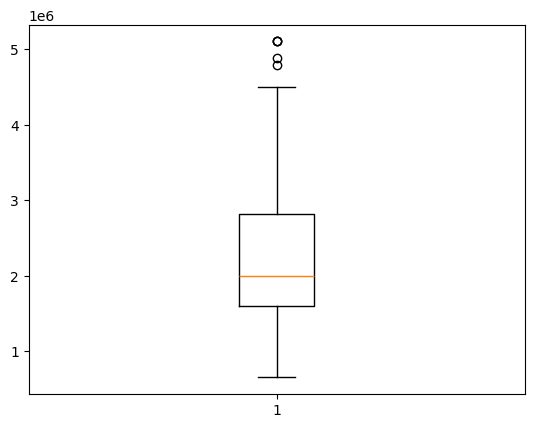

In [43]:
plt.boxplot(x=dataset['Price'])

In [44]:
dataset.describe()

,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,4.210000e+02
mean,745.154394,207.346793,194.489311,60.649644,1143.071259,1597.301663,1978.938242,1681.337292,6780.631829,3984.890736,31.210855,38.435344,852.748219,2.282374e+06
std,1669.849973,107.493869,99.098691,16.103946,3953.521931,1279.673943,1064.245179,681.520440,9569.884534,5327.529760,10.536434,7.584015,626.446511,9.525293e+05
min,65.000000,64.000000,70.000000,27.000000,14.000000,360.000000,457.000000,540.000000,1220.000000,740.000000,19.200000,16.000000,117.000000,6.500000e+05
25%,200.000000,141.000000,131.000000,50.000000,50.000000,914.000000,1350.000000,1250.000000,2650.000000,1610.000000,25.110000,35.000000,513.000000,1.600000e+06
50%,280.000000,175.000000,166.000000,56.000000,80.000000,1155.000000,1675.000000,1495.000000,3600.000000,2204.000000,27.900000,36.110000,680.000000,1.990000e+06
75%,375.000000,230.000000,215.000000,72.000000,175.000000,1690.000000,2200.000000,1940.000000,6750.000000,4184.000000,33.900000,39.300000,1001.000000,2.810000e+06
max,13850.000000,530.000000,476.000000,115.000000,29500.000000,7220.000000,6400.000000,4850.000000,75000.000000,42500.000000,88.400000,77.100000,4420.000000,5.100000e+06


In [45]:
dataset[dataset['Price']>4.510000e+06]

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
140,Jet,2950,478.0,441.0,79.0,5373,6110,2880.0,2220.0,15000,8157,47.7,43.9,1546,4790000.0
141,Jet,2950,475.0,441.0,79.0,4704,6350,2630.0,2220.0,15000,8195,47.7,43.9,1450,4880000.0
142,Jet,2950,464.0,459.0,97.0,6098,6830,3937.0,2817.0,15000,7950,47.7,35.7,1431,5100000.0
154,Jet,4000,85.0,476.0,97.0,7385,4442,4690.0,2910.0,22450,13700,55.5,53.5,2300,5100000.0
155,Jet,3650,472.0,461.0,97.0,7384,3699,5030.0,2900.0,22000,11811,55.6,53.6,2600,5100000.0


In [46]:
dataset.to_csv('Cleaned Plane.csv')

In [47]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Analyzing The Dataset

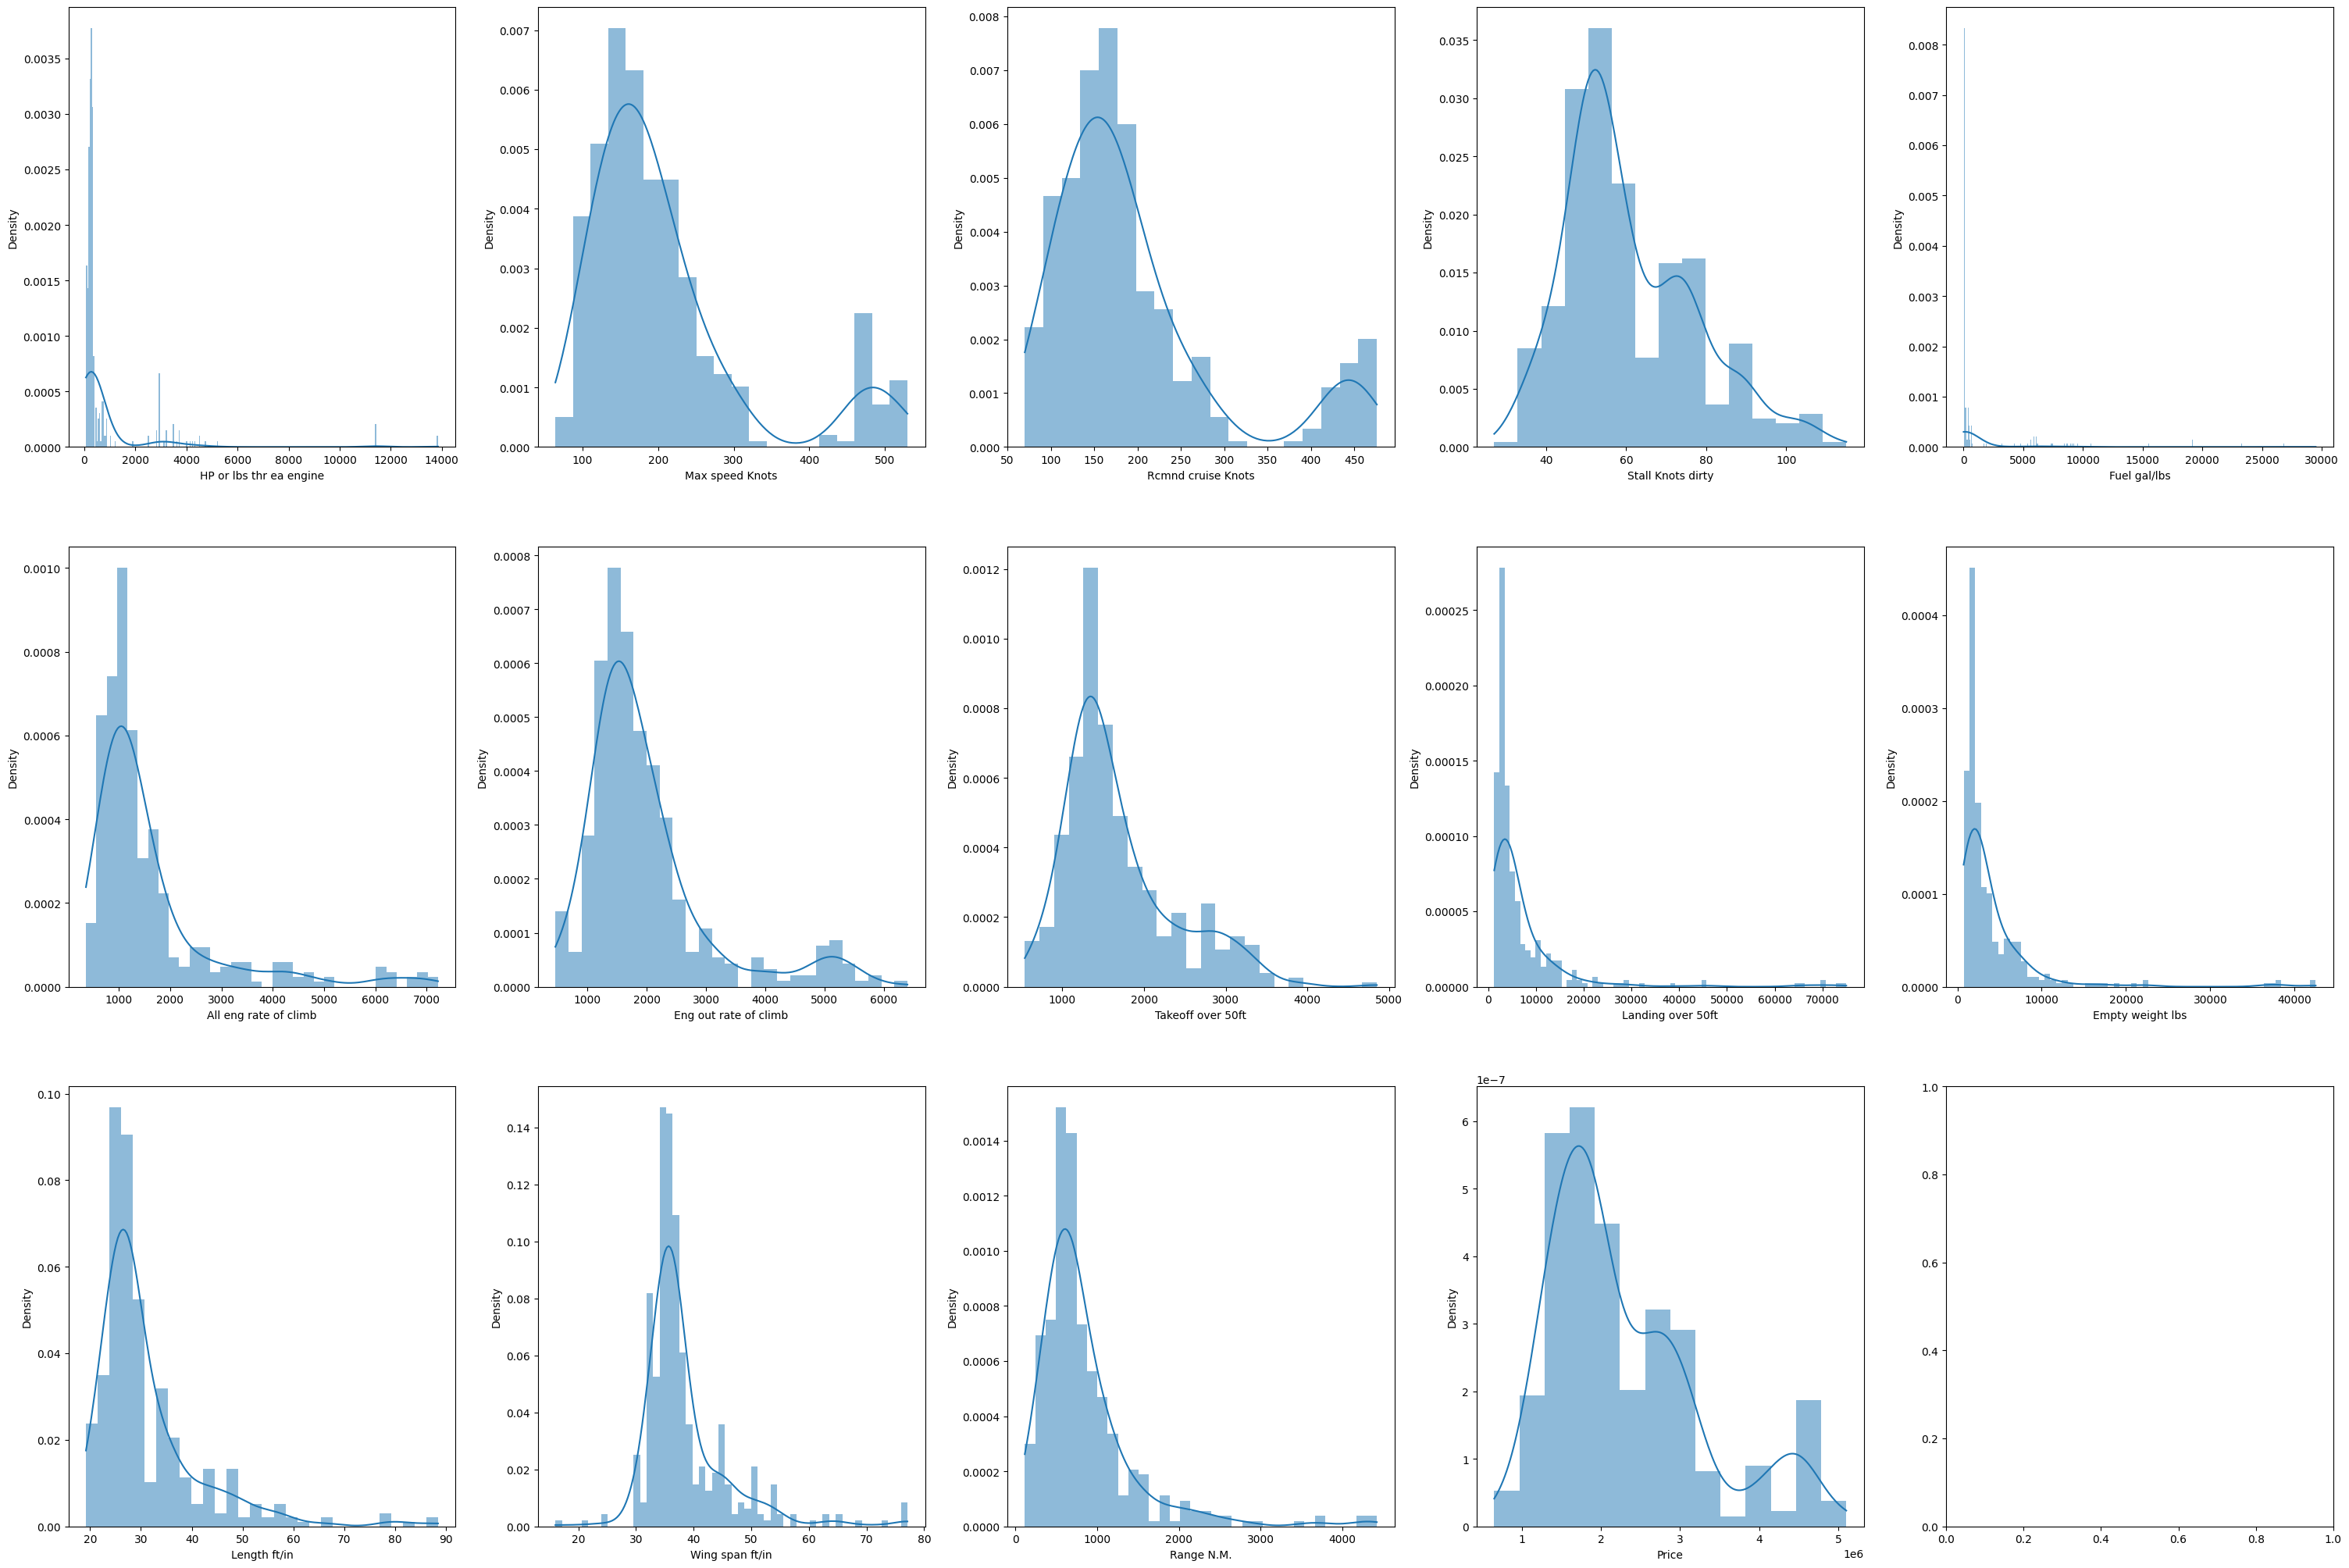

In [48]:
plain_price_df = dataset.drop(['Engine Type'],axis=1)
fig,axs = plt.subplots(ncols = 5, nrows = 3, figsize = (30,20))
index = 0
axs = axs.flatten()
for k, v in plain_price_df.items():
  sns.histplot(v, ax = axs[index], kde=True, stat = 'density', linewidth = 0)
  index += 1
plt.tight_layout(pad=0.4, w_pad = 0.5, h_pad = 5.0)

## Encoding Categorical Data

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [51]:
print(X)

[[0.0 1.0 0.0 ... 25.3 37.5 370]
 [0.0 1.0 0.0 ... 20.7 36.1 190]
 [0.0 1.0 0.0 ... 21.5 35.0 210]
 ...
 [0.0 0.0 1.0 ... 43.5 47.8 1515]
 [0.0 0.0 1.0 ... 36.8 42.8 1336]
 [0.0 0.0 1.0 ... 34.8 42.8 1444]]


In [52]:
print(y)

[1300000. 1230000. 1600000. 1300000. 1250000. 1100000. 2500000. 2800000.
 2500000. 3000000. 3010000. 2120000. 1450000. 1450000. 1400000. 1150000.
 1025000.  850000.  700000. 1730000. 1600000. 1350000. 1700000. 1810000.
 1700000. 1700000. 1200000. 1550000. 1740000. 1380000. 1265000. 1265000.
 1275000. 1375000. 1500000. 3500000. 3288000. 2485000. 2485000. 2590000.
 3045000. 2980200. 2762000. 3000000. 2810000. 2720000. 3020000. 2840000.
 2680000. 2680000. 2680000. 2850000. 2800000. 3000000. 3130000. 2700000.
 3000000. 3080000. 3130000. 2030000. 2140000. 2300000. 2050000. 2950000.
 2950000. 2000000. 2000000. 2000000. 1900000. 2500000. 2500000. 2500000.
 2500000. 2500000. 2068800. 1860000. 3220000. 3220000. 1910000. 2090000.
 1930000. 1970000. 1950000. 1920000. 1810000. 1810000. 1810000. 1965000.
 2500000. 2500000. 1850000. 1660000. 1600000. 2950000. 1750000. 2660000.
 1750000. 1830000. 1920000. 2000000. 2130000. 1980000. 1900000. 1800000.
 1710000. 1800000. 1660000. 1830000. 1785800. 18300

Splitting the Dataset

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Applying Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])

## Model

In [56]:
from sklearn.metrics import r2_score

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pred = regressor.predict(X_test)

In [59]:
coefficients = regressor.coef_
intercept = regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-373658.30375587  211140.93548287  162517.368273    260808.88348412
   87300.84006473  967596.10940519  -55766.53476402  141731.92245073
   58558.70897639 -128025.29427794   97644.20232127 -711441.74895811
   55892.80373498   98249.06879228  205282.29243079   12696.52735441]
Intercept: 2118066.2020936203


In [60]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    sc=StandardScaler()
    X_train[:,3:] = sc.fit_transform(X_train[:,3:])
    X_test[:,3:] = sc.transform(X_test[:,3:])
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [61]:
np.argmax(scores)

948

In [62]:
scores[np.argmax(scores)]

0.9538520722921091

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
sc=StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred = regressor.predict(X_test)

## Evaluating the Model Performance

In [65]:
r2_score(y_test, y_pred)

0.9538520722921091

## Visualizing

In [66]:
residual=y_test-y_pred

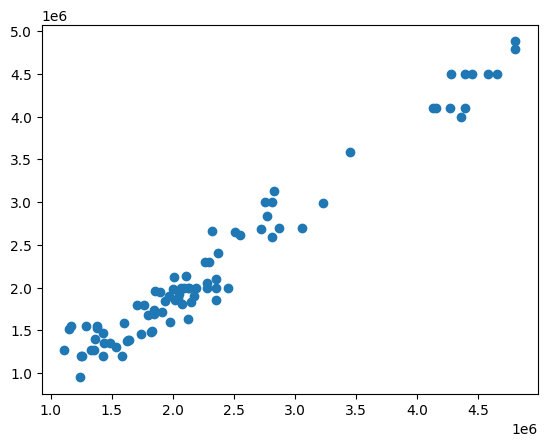

In [67]:
plt.scatter(x=y_pred,y=y_test)